In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
medicare_filepath = '../data/medicare_part_b/MEDICARE_PROVIDER_CHARGE_INPATIENT_DRGALL_FY2017.CSV'

In [3]:
medicare2017 = pd.read_csv(medicare_filepath, encoding = "ISO-8859-1")
medicare2017.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.78570,25823.714290,24057.392860
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56250,20688.343750,19791.406250
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.54546,11811.181820,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33330,19134.000000,18154.000000
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47059,8519.470588,6714.882353


In [4]:
# source: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
nyc_zipcodes = [10453,10457,10460,10458,10467,10468,10451,10452,10456,10454,10455,10459,10474,10463,10471,10466,10469,10470,
10475,10461,10462,10464,10465,10472,10473,11212,11213,11216,11233,11238,11209,11214,11228,11204,11218,11219,11230,11234,
11236,11239,11223,11224,11229,11235,11201,11205,11215,11217,11231,11203,11210,11225,11226,11207,11208,11211,11222,11220,
11232,11206,11221,11237,10026,10027,10030,10037,10039,10001,10011,10018,10019,10020,10036,10029,10035,10010,10016,10017,
10022,10012,10013,10014,10004,10005,10006,10007,10038,10280,10002,10003,10009,10021,10028,10044,10065,
10075,10128,10023,10024,10025,10031,10032,10033,10034,10040,11361,11362,11363,11364,11354,11355,11356,11357,11358,
11359,11360,11365,11366,11367,11412,11423,11432,11433,11434,11435,11436,11101,11102,11103,11104,11105,11106,11374,
11375,11379,11385,11691,11692,11693,11694,11695,11697,11004,11005,11411,11413,11422,11426,11427,11428,11429,11414,
11415,11416,11417,11418,11419,11420,11421,11368,11369,11370,11372,11373,11377,11378,10302,10303,10310,10306,10307,
10308,10309,10312,10301,10304,10305,10314]

nyc2017 = medicare2017[medicare2017['Provider Zip Code'].isin(nyc_zipcodes)]
nyc2017.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
118087,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",330009,BRONX-LEBANON HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,NY,10456,NY - Bronx,11,94370.72727,120847.45460,113285.72730
118088,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,330009,BRONX-LEBANON HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,NY,10456,NY - Bronx,12,28693.25000,27661.25000,24754.58333
118089,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,330009,BRONX-LEBANON HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,NY,10456,NY - Bronx,22,17612.59091,17535.45455,15560.31818
118090,100 - SEIZURES W MCC,330009,BRONX-LEBANON HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,NY,10456,NY - Bronx,11,23282.00000,24989.18182,22215.90909
118091,101 - SEIZURES W/O MCC,330009,BRONX-LEBANON HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,NY,10456,NY - Bronx,23,13465.65217,16256.78261,14523.52174


In [8]:
nyc2017["Hospital Referral Region (HRR) Description"].unique()
nyc2017[nyc2017["Hospital Referral Region (HRR) Description"] == "NY - East Long Island"]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
118457,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,330014,JAMAICA HOSPITAL MEDICAL CENTER,89TH AVENUE AND VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,NY - East Long Island,21,15515.04762,13979.85714,12271.714290
118458,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,330014,JAMAICA HOSPITAL MEDICAL CENTER,89TH AVENUE AND VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,NY - East Long Island,28,31265.57143,19698.03571,17651.750000
118459,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,330014,JAMAICA HOSPITAL MEDICAL CENTER,89TH AVENUE AND VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,NY - East Long Island,51,23529.58824,13833.50980,11294.980390
118460,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,330014,JAMAICA HOSPITAL MEDICAL CENTER,89TH AVENUE AND VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,NY - East Long Island,18,19874.66667,11167.94444,8006.277778
118461,069 - TRANSIENT ISCHEMIA,330014,JAMAICA HOSPITAL MEDICAL CENTER,89TH AVENUE AND VAN WYCK EXPRESSWAY,JAMAICA,NY,11418,NY - East Long Island,44,15495.11364,10345.29546,8462.409091
...,...,...,...,...,...,...,...,...,...,...,...,...
128564,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,330395,ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,327 BEACH 19TH STREET,FAR ROCKAWAY,NY,11691,NY - East Long Island,78,174708.52560,71586.85897,62017.064100
128565,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,330395,ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,327 BEACH 19TH STREET,FAR ROCKAWAY,NY,11691,NY - East Long Island,263,65822.82510,24608.09506,19730.053230
128566,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,330395,ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,327 BEACH 19TH STREET,FAR ROCKAWAY,NY,11691,NY - East Long Island,81,39613.83951,15269.80247,11754.913580
128567,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,330395,ST JOHN'S EPISCOPAL HOSPITAL AT SOUTH SHORE,327 BEACH 19TH STREET,FAR ROCKAWAY,NY,11691,NY - East Long Island,14,37547.42857,12182.64286,9403.500000


In [102]:
def get_stats(data, id_col, info_col, nickname=None):
    temp = data[[id_col, info_col]] \
    .groupby([id_col])[info_col] \
    .agg(['mean','std', 'count']) 
#     temp['coef_var'] = temp['std'] / temp['mean']
    if nickname:
        temp.rename(columns={"mean": "mean_" + nickname
                             , "std": "std_" + nickname 
#                              , "coef_var": "coef_var_" + nickname
                             ,"count": "count_" + nickname
                            }, inplace=True)
    return temp

drg_stats = get_stats(nyc2017, 'DRG Definition', 'Average Covered Charges', 'ACC')
# drg_stats = drg_stats.join(get_stats(nyc2017, 'DRG Definition', 'Average Total Payments', 'ATP'))
# drg_stats = drg_stats.join(get_stats(nyc2017, 'DRG Definition', 'Average Medicare Payments', 'AMP'))
drg_stats = drg_stats.join(get_stats(nyc2017, 'DRG Definition', 'Total Discharges', 'TD'))
drg_stats.reset_index(inplace=True)
drg_stats.fillna(0, inplace=True)

# drg_stats = drg_stats.drop(columns=['count_ACC', "count_ATP"])
drg_stats.rename(columns={"count_AMP": "count"}, inplace=True)

##TODO add count,total discharges

drg_stats.head()

,DRG Definition,mean_ACC,std_ACC,count_ACC,mean_TD,std_TD,count_TD
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,983400.275433,329143.177388,3,28.333333,16.623277,3
1,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,617502.664143,246294.263856,14,34.857143,33.745329,14
2,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",390169.971839,182629.846572,20,25.800000,18.619741,20
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,526437.695650,74103.806871,2,19.000000,5.656854,2
4,007 - LUNG TRANSPLANT,626167.916700,0.000000,1,12.000000,0.000000,1


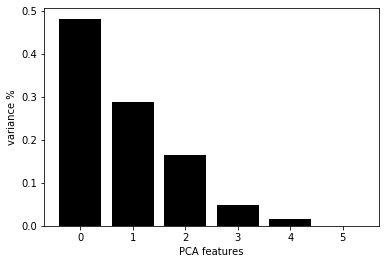

In [103]:
drg_stats_std = StandardScaler().fit_transform(drg_stats.iloc[:,1:])

pca = PCA(n_components=drg_stats_std.shape[1])
principalComponents = pca.fit_transform(drg_stats_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

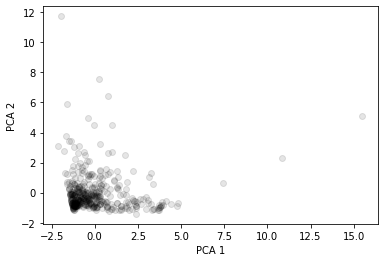

In [104]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

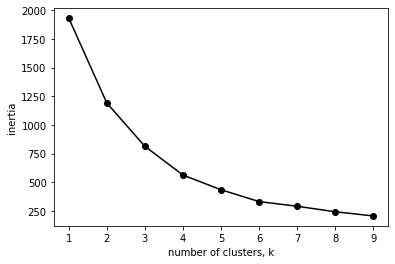

In [105]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [106]:
km = KMeans(n_clusters=3)
km.fit(drg_stats_std)
res = km.predict(drg_stats_std)

In [107]:
res_stats = drg_stats
res_stats['cluster'] = res
res_stats.head()

,DRG Definition,mean_ACC,std_ACC,count_ACC,mean_TD,std_TD,count_TD,cluster
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,983400.275433,329143.177388,3,28.333333,16.623277,3,1
1,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,617502.664143,246294.263856,14,34.857143,33.745329,14,1
2,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",390169.971839,182629.846572,20,25.800000,18.619741,20,0
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,526437.695650,74103.806871,2,19.000000,5.656854,2,1
4,007 - LUNG TRANSPLANT,626167.916700,0.000000,1,12.000000,0.000000,1,1


In [108]:
res_stats[res_stats['cluster'] == 2]['DRG Definition']

239    470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...
385    871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...
Name: DRG Definition, dtype: object

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

def find_best_cluster(max_clusters, input_data, labels_func):
    best_cluster = 0
    best_avg = -1
    best_labels = []
    for n_clusters in range(2,max_clusters+1):
        cluster_labels = labels_func(input_data, n_clusters)
        silhouette_avg = silhouette_score(input_data, cluster_labels)
        if silhouette_avg > best_avg:
            best_avg = silhouette_avg
            best_cluster = n_clusters
            best_labels = cluster_labels
    return {'cluster_num': best_cluster, 'labels': best_labels, 'score': best_avg}

def get_kmeans_labels(input_data, n_clusters):
    km = KMeans(random_state = 1993, n_clusters = n_clusters)
    km.fit(input_data)
    res = km.predict(input_data)
    return res

def get_gaussian_labels(input_data, n_clusters):
    gmm = GaussianMixture(n_components = n_clusters, random_state = 1993)
    gmm.fit(input_data)
    res = gmm.predict(input_data)
    return res

def visualize_avgs(input_data, n_clusters, cols):
    avgs = pd.DataFrame()
    plt.figure(figsize=(15,5))

    for cluster in range(0, n_clusters):
        temp = input_data[input_data['cluster'] == cluster][cols].mean()
        
        plt.plot(temp.index, temp.values, label=cluster)
            
        temp['cluster'] = cluster
        avgs = avgs.append(temp, ignore_index=True)
    plt.legend(range(0, n_clusters))
    plt.show()   
    return avgs

In [110]:
info_kmeans = find_best_cluster(7, drg_stats_std, get_kmeans_labels)
info_gauss  = find_best_cluster(7, drg_stats_std, get_gaussian_labels)

In [111]:
print("KMEANS - Clusters: {}, Score: {}".format(info_kmeans['cluster_num'], info_kmeans['score']))
print("GAUSS  - Clusters: {}, Score: {}".format(info_gauss['cluster_num'], info_gauss['score']))

KMEANS - Clusters: 4, Score: 0.5387559233828232
GAUSS  - Clusters: 2, Score: 0.44373412400690526


In [112]:
res_stats = drg_stats
res_stats['cluster'] = info_kmeans["labels"]
res_stats.head()

,DRG Definition,mean_ACC,std_ACC,count_ACC,mean_TD,std_TD,count_TD,cluster
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,983400.275433,329143.177388,3,28.333333,16.623277,3,3
1,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,617502.664143,246294.263856,14,34.857143,33.745329,14,3
2,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",390169.971839,182629.846572,20,25.800000,18.619741,20,3
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,526437.695650,74103.806871,2,19.000000,5.656854,2,3
4,007 - LUNG TRANSPLANT,626167.916700,0.000000,1,12.000000,0.000000,1,3


In [113]:
for i in range(0,6):
    print(len(res_stats[res_stats['cluster'] == i]['DRG Definition']))

2
320
67
29
0
0


In [132]:
res_stats[res_stats['cluster'] == 3]

,DRG Definition,mean_ACC,std_ACC,count_ACC,mean_TD,std_TD,count_TD,cluster
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,983400.275433,329143.177388,3,28.333333,16.623277,3,3
1,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,617502.664143,246294.263856,14,34.857143,33.745329,14,3
2,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",390169.971839,182629.846572,20,25.800000,18.619741,20,3
3,005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRA...,526437.695650,74103.806871,2,19.000000,5.656854,2,3
4,007 - LUNG TRANSPLANT,626167.916700,0.000000,1,12.000000,0.000000,1,3
7,014 - ALLOGENEIC BONE MARROW TRANSPLANT,571470.166700,0.000000,1,24.000000,0.000000,1,3
8,016 - AUTOLOGOUS BONE MARROW TRANSPLANT W CC/MCC,300581.055150,110945.249766,2,39.500000,12.020815,2,3
9,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,257363.891683,119222.684763,6,23.333333,11.656186,6,3
10,024 - CRANIO W MAJOR DEV IMPL/ACUTE COMPLEX CN...,253454.435650,159046.166919,2,16.500000,0.707107,2,3
23,040 - PERIPH/CRANIAL NERVE & OTHER NERV SYST P...,221022.529160,91988.616550,5,17.400000,9.449868,5,3


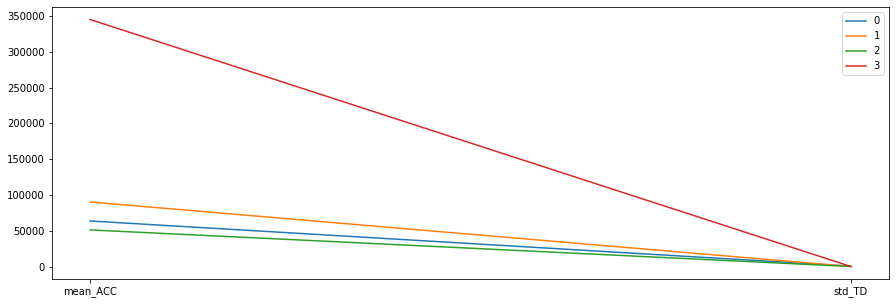

,cluster,mean_ACC,std_TD
0,0.0,63660.802436,582.971935
1,1.0,90243.319297,10.648777
2,2.0,51186.660877,40.663236
3,3.0,345215.792539,24.140459


In [131]:
visualize_avgs(res_stats, 4, ["mean_ACC", "std_TD"])

In [ ]:
We're trying to find out what impacts hospital prices for both medicare and people's out of pocket 
Find demographics/wealth around each hospital
Geoviz each hospital